[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/14-Control-Statements-and-Iteration.ipynb)






# <a name="14-title"><font size="6">Module 14: Control Statements and Interation</font></a>

---

In this module we will discuss <font color="dodgerblue">**control statements**</font>, <font color="dodgerblue">**iteration**</font>, and <font color="dodgerblue">**vectorized operations**</font>. These are fundamental tools used in R programming. A simple analysis will not need them, but as we analyze more complex data, these tools will be critical in completing our analyses.

We start by loading and installing the necessary R packages in the code cells below.

In [ ]:
# install permute package for jackal data
# install microbenchmark to compare computation speeds
install.packages(c("permute", "microbenchmark"))

In [ ]:
library(permute)
library(tidyverse)  # we will use ggplot2
library(microbenchmark)

# <a name="control">Control Statements</a>

---

A <font color="dodgerblue">**control statement**</font> is code that controls what is executed later in the program or script. The most well-known examples are **if-else** and **switch** statements.



## <a name="if">`if`, `else if` and `else`</a>

---

The basic form of an `if` statement in R is as follows:

```
if (condition) {
  true_action
} else {
  false_action
}
```

If the condition is `TRUE`, `true_action` is evaluated; if the condition is `FALSE`, the optional `false_action` is evaluated. Typically the actions are compound statements contained within `{ }`.





## <a name="if-generation">Example: Are They a Millenial?</a>

---

In the code cell below, we write an initial `if` statement to determine whether or not a person is a millennial given their birth year.

In [ ]:
year <- 1990

In [ ]:
if (year >= 1981 & year <= 1996) {generation <- "millennial"}

In [ ]:
generation

[1] "millennial"

In [ ]:
year <- 2000

In [ ]:
if (year >= 1981 & year <= 1996) {
  generation <- "millennial"
} else {
  generation <- "not a millennial"
}

In [ ]:
generation

[1] "not a millennial"

In [ ]:
if (year >= 1981 & year <= 1996) {
  generation <- "millennial"
  diff <- year + 10000
} else {
  generation <- "not a millennial"
  diff <- year + 20000
}

In [ ]:
generation
diff

[1] "not a millennial"

[1] 22000

## <a name="else-if">Adding `else if` Conditions</a>

---

If-else statements in R rely on 3 statements: `if`, `else if`, `else`.

-   The `if` statement can be used by itself.
-   The `else` statement must be used in conjunction with the `if` function.
-   `else if` must be used in conjunction with the `if` statement and should be used with an `else` statement (otherwise there may be cases that are left out).

An `if` or `else if` statement is used to perform a sequence of commands when its argument is `TRUE`.

An `else` statement is used to perform a sequence of commands when all previous control statement arguments are `FALSE` in a group of control statements.

A set of `if`, `else if`, and `else` statements will having the following structure:

```
if (logical statement) {
  # code to run if logical statement is true
} else if (another logical statement) {
  # code to run if another logical statement is true
} else {
  # code to run if none of the other logical statements were true
}
```

- The curly braces, `{}`, are used to indicate the set of commands we want to execute if the logical statement is true.
- The `else if` and `else` statements should be <font color="dodgerblue">**one space after the `}`**</font> used to indicate the end if the previous `if` or `else if` statement.
- It is common to indent the code within a control statement by one tab to make the code easier to read.

### <a name="gen-class">Generation Classifications</a>

---

According to the CareGivers of America at <https://caregiversofamerica.com/2022-generation-names-explained/>, here is a breakdown of birth years for seven recent generations.

-   The Greatest Generation: born 1901-1927.
-   The Silent Generation: born 1928-1945.
-   The Baby Boomer Generation: born 1946-1964.
-   Generation X: born 1965-1980.
-   Millennials: born 1981-1996.
-   Generation Z: born 1997-2012.
-   Gen Alpha: born 2013 - 2025.

Let's say we have a vector with the birth year of an individual and we wish to identify the individual's generation based on the dates above. We can do this using a sequence of control statements. For simplicity, we only use the last four generations (Millennials, Generation Z, Gen Alpha, and Other).


In [ ]:
year <- 2000  # set a value for year

In [ ]:
# categorize year as a generation
if (year >= 1981 & year <= 1996) {
  generation <- "millennial"
} else if (year >= 1997 & year <= 2012) {
  generation <- "generation z"
} else if (year >= 2013 & year <= 2025) {
  generation <- "gen alpha"
} else {
  generation <- "other"
}

In [ ]:
generation  # check the result

[1] "generation z"

## <a name="function-gen">Creating a Classification Function</a>

---

As expected, `generation` categorizes a person born in 2000 as being part of `"generation z"`. It would be even better if we made a function to do this categorization so that we can do the categorization for many different values of `year`. We create a function, `determine_generation`, that takes the argument `year` and returns the generation corresponding to that year.

In [ ]:
determine_generation <- function(year) {
  if (year >= 1981 & year <= 1996) {
    generation <- "millennial"
  } else if (year >= 1997 & year <= 2012) {
    generation <- "generation z"
  } else if (year >= 2013 & year <= 2025) {
    generation <- "gen alpha"
  } else {
    generation <- "other"
  }
  return(generation)
}

We now use the function to determine the generation associated with the value 1985.

In [ ]:
determine_generation(1985)

[1] "millennial"

The above example is trivial and unrealistic. E.g., our control statements won't work with a vector of inputs. Additionally, it doesn't handle cases like non-integer values very well (what generation is 1981.5?). However, it paints a picture of what can be done using control statements.



## <a name="quest1">Question 1</a>

---

Create a function called `the_cure()` that classifies the day of the week based on lyrics from the song ["Friday I'm in Love"](https://music.youtube.com/watch?v=Dt7oMSOB7nw)<sup>1</sup> by the band The Cure.

> **Monday** you can fall apart <br>
> **Tuesday, Wednesday**, break my heart <br>
> Oh, **Thursday** doesn't even start <br>
> It's **Friday**, I'm in love <br>
> **Saturday** wait <br>
> And **Sunday** always comes too late

<br>  

<font size=2>1. Robert James Smith, Simon Gallup, Perry Bamonte, Boris Williams, and Porl Thompson (1992), "Friday I'm in Love", Wish. Fiction Records.</font>

In [ ]:
# solution


In [ ]:
# check code


# <a name="switch">The `switch()` Function</a>

---

The `switch` function is a compact way of evaluating a set of `if`, `else if`, and `else` statements when we need to change our action depending on a single value argument that can only take a small number of values.

The `switch` function takes the following arguments:

-   `EXPR`: a single value that evaluates to a number or character string.
-   … A list of what to do based on the value of `EXPR`.



## <a name="animal-switch">Animal Example</a>

---

Let's create a function called `sound` that takes a single character value `animal` and returns the “sound” associated with that animal.

- The `switch` function takes the value in `animal` and then decides what to do.

In [ ]:
sound <- function(animal) {
  switch(animal,
         "dog" = "ruff",
         "cat" = "meow",
         "horse" = "neigh",
         "frog" = "ribbit",
         "cow" = "moo",
         "duck" = "quack",
         "rooster" = "keekarikee",
         "coyote" = "yipp",
         "donkey" = "hee-haw",
         "we don't know what sound this animal makes")
}

-   If `animal` is `"dog"`, then the `switch` function returns `"ruff"`.
-   If `animal` is `"cat"`, then the `switch` function returns `"meow"`.
-   The last input to the `switch` argument in the above example is what we want to return if the value of `animal` doesn't match any of the previous choices.

Let's use this function.

In [ ]:
sound("dog")

[1] "ruff"

In [ ]:
sound("duck")

[1] "quack"

In [ ]:
sound("goose")

[1] "we don't know what sound this animal makes"

## <a name="quest2">Question 2</a>

---

Create a `switch()` function called `my_mood()` that classifies the day of the week based on lyrics from the song "Friday I'm in Love" by The Cure.

> **Monday** you can fall apart <br>
> **Tuesday, Wednesday**, break my heart <br>
> Oh, **Thursday** doesn't even start <br>
> It's **Friday**, I'm in love <br>
> **Saturday** wait <br>
> And **Sunday** always comes too late



In [ ]:
# solution


In [ ]:
# check code


# <a name="iterate">Iteration</a>

---

<font color="dodgerblue">**Iteration**</font> in programming is when we repeatedly (or iteratively) run the same code block until some condition is satisfied.

The two *main* iteration approaches in R are <font color="dodgerblue">`for`</font> and <font color="dodgerblue">`while`</font> loops.

There is also a `repeat` loop that repeatedly runs the same set of code until the `break` function is used.

-   The `break` function is used to “break out” of the current iteration of the inner-most loop.
-   The `next` function is used stop the current iteration and advance the looping index.

The `repeat`, `break`, or `next` functions are not commonly used nor needed, so we will not be covering them in this module.


# <a name="for">`for` loops</a>

---

`for` loops are useful if we know in advance the set of values that we want to iterate over. For example, we may want to perform an action for integer values running from 1 to 100.

The basic syntax of a `for` loop is shown in the pseudo code below.

```
for (i in vector_of_values) {
  # some code to run
}
```

We have the following components of the `for` loop:

-   The loop starts with `for`, which indicates that we want to perform a `for` loop.
-   Inside parentheses after `for`, we have the iterator name, which is the name of the variable that our loop is changing.  
  - In this example, we called the iterator `i`. Names like `i`, `j`, `k`, and `l` are commonly used, but we can use any name that won't conflict with other object in memory.
-   After the iterator name, we use the syntax “`in`”, which indicates that our iterator will take the values in `vector_of_values`.
-   `vector_of_values` is a vector containing the values the iterator can take as we progress through the loop.
-   After the parenthesis, we use the curly braces `{}` to indicate the code we want to run in our loop.
-   The `#some code to run` is the code we wish to execute in our loop.

Here's what happens in a `for` loop:

1.  The iterator takes the first value in `vector_of_values`.
2.  Using that iterator value, the loop runs the code in the curly braces.
3.  After that code runs, the `for` function will change the iterator to the next value in `vector_of_values`.
4.  We repeat steps 2 and 3 until there are no more values in `vector_of_values`.
5.  We exit the loop.

Here's an example of a simple `for` loop that prints the current iterator value for the values 1, 2, and 3.

In [ ]:
for (i in 1:3) {
  message("The current iterator value is ", i)
}

The current iterator value is 1

The current iterator value is 2

The current iterator value is 3



The `message` function prints a diagnostic message to the screen. Notice that the `message` function can combine text and numeric values into a single message. We have to manually include spaces in the text.

Here is a loop that takes a character string of animal names and returns the sound made by the animal. We use the `sound` function we previously created.

In [ ]:
for (animal in c("dog", "cat", "coyote")) {
  current_sound <- sound(animal)
  message("The ", animal, " makes the sound ", current_sound, ".")
}

The dog makes the sound ruff.

The cat makes the sound meow.

The coyote makes the sound yipp.



## <a name="bootstrap">Example: Bootstrap Distributions</a>

---

<font color="dodgerblue">**Bootstrapping**</font> is the process of generating many different random samples from one random sample to obtain an estimate for a population parameter. For each randomly selected resample, we calculate a statistic of interest. Then we construct a new distribution of bootstrap statistics that approximates a sampling distribution for some sample statistic (such as a mean, proportion, variance, and others). We can use bootstrapping with any sample, even small ones. We can bootstrap any statistic. Thus, bootstrapping provides a robust method for performing statistical inference that we can adapt to many different situations in statistics and data science.



#### <a name="16boot-steps">A Bootstrapping Algorithm</a>

---

Given an original sample of size $n$ from a population:

1.  Draw a  <font color="dodgerblue">**bootstrap resample**</font> of the same size, $n$, with replacement from the original sample.
2.  Compute the relevant statistic (mean, proportion, max, variance, etc) of that sample.
3.  Repeat this many times (say $100,\!000$ times).

-   A distribution of statistics from the bootstrap samples is called a  <font color="dodgerblue">**bootstrap distribution**</font>.
-   A bootstrap distribution gives an *approximation* for the sampling distribution.
-   We can inspect the center, spread and shape of the bootstrap distribution and do statistical inference.



### <a name="quest3">Question 3</a>

---

Consider a random sample of 4 golden jackal mandible lengths (in mm):

$$120, 107, 110, \mbox{ and } 116.$$

Which of the following could be a possible
bootstrap resample? Explain why or why not.

<br>

a. 120, 107, 116 <br>
b. 110, 110, 110, 110 <br>
c. 120, 107, 110, 116 <br>
d. 120, 107, 110, 116, 120 <br>
e. 110, 130, 120, 107 <br>

<br>

#### <a name="sol3">Solution to Question 3</a>

---

##### Part a



<br>

##### Part b



<br>

##### Part c



<br>


##### Part d



<br>

##### Part e


<br>  


### <a name="16monte">Monte Carlo Methods</a>

---

<font color="dodgerblue">**Monte Carlo methods**</font> are computational algorithms that rely on repeated random sampling. A bootstrap distribution is one example of a Monte Carlo method. A bootstrap distribution theoretically would contain the sample statistics from *all possible bootstrap resamples*. If we pick an initial sample size $n$, then there exists a total of $n^n$ possible bootstrap resamples. In the case of $n=20$, we have $20^{20} \approx 1.049 \times 10^{26}$ possible resamples. If we ignore the ordering in which we pick the sample, when $n=20$, we have a total of $68,\!923,\!264,\!410$ (almost 69 billion!) distinct bootstrap
resamples.

For small samples, we could write out all possible bootstrap resamples. For larger values of $n$ (and we see $n=20$ is already extremely large), it is really not practical or feasible to generate all possible bootstrap resamples while avoiding duplicates. Instead, we use Monte Carlo methods to repeatedly pick random samples that we use to approximate a sampling distribution. The Monte Carlo method of
generating many (but necessarily all) bootstrap resamples introduces additional uncertainty and variability into the analysis. The more bootstrap resamples we choose, the less uncertainty we have.

-   By default, we will create $N =100,\!000 = 10^5$ bootstrap resamples.
-   In some cases (very large $n$), we may choose a smaller number of resamples for the sake of time.
-   For typically bootstrapping, it is recommended to use at least $N=10,\!000$ bootstrap resamples.

Monte Carlo methods were first explored by the Polish mathematician Stanislow Ulam in the 1940s while working on the initial development of nuclear weapons at Los Alamos National Lab in New Mexico. The research
required evaluating extremely challenging integrals. Ulam devised a numerical algorithm based on resampling to approximate the integrals. The method was later named “Monte Carlo”, a gambling region in Monaco,
due to the randomness involved in the computations.



### <a name="16jackal">Case Study: Golden Jackal Mandible Length</a>

---

<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/5/5e/Golden_jackal_-_portrait.jpg"
alt="Golden Jackal Portrait" width = "45%"/> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img
src="https://upload.wikimedia.org/wikipedia/commons/4/40/Grey_wolf_%26_golden_jackal_mandibles.jpg"
alt="Wolf and Jackal Mandible Bones" width = "35%"/>
<figcaption aria-hidden="true">
Left Credit:  Вых Пыхманн, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons <br> Right Credit: Mariomassone, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons
</figcaption>
</figure>

A zoologist would like to answer the following question:

> What is the average mandible (jaw) length of all golden jackals (Canis aureus)?


The data frame<sup>2</sup> `jackal` in the `permute` package contains a sample of $n=20$ mandibles from male and female golden jackals. For each of the 20 observations, two variables are recorded:

-   `Length` is the length of the mandible in millimeters (mm).
-   `Sex` is a categorical variable with two levels: `Male` and `Female`.

<br>

<font size="2"> 2.  Manly, B.F.J. (2007) *Randomization, bootstrap and Monte Carlo methods in biology*. Third Edition. Chapman & Hall/CRC, Boca Raton.</font>


In [ ]:
# run only if you need to install and load permute
#install.packages("permute")  # installing permute package
#library(permute)  # loading permute package

#### <a name="16sum-jackal">Summarizing and Storing the Data</a>

---

In the code cell below we load the `jackal` data from the `permute` package and provide a numerical summary of the two variables in the sample.

In [ ]:
data(jackal)  # load jackal data
summary(jackal)  # numerical summary of each variable

     Length          Sex    
 Min.   :105.0   Male  :10  
 1st Qu.:107.8   Female:10  
 Median :111.0              
 Mean   :111.0              
 3rd Qu.:113.2              
 Max.   :120.0              

The code cell below displays the distribution of mandible lengths
separately for males and females.

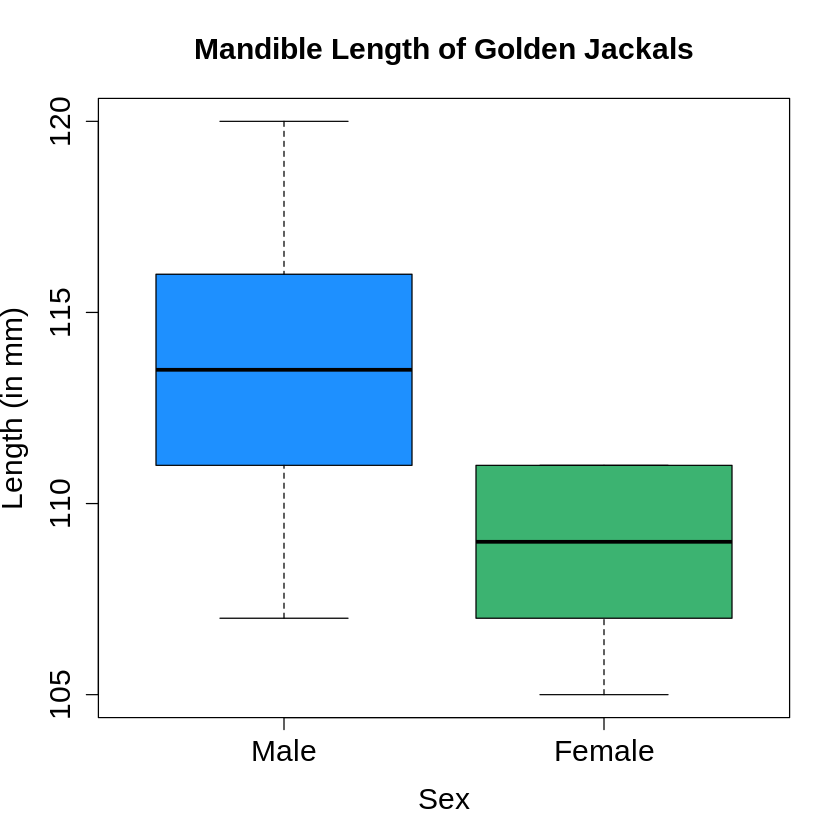

In [ ]:
plot(Length ~ Sex, data = jackal,
     col = c("dodgerblue", "mediumseagreen"),
     main = "Mandible Length of Golden Jackals",
     ylab = "Length (in mm)",
     cex.lab=1.5, cex.axis=1.5, cex.main=1.5)

We will be analyzing mandible lengths for both adult male and female golden jackals. In the code cell below, we save the $n=20$ mandible lengths to a vector called `jaw_sample`.

In [ ]:
jaw_sample <- jackal$Length  # store mandible lengths to vector
jaw_sample  # print sample to screen

[1] 120 107 110 116 114 111 113 117 114 112 110 111 107 108 110 105 107 106 111
[20] 111

### <a name="16jackal-boot">Creating a Bootstrap Distribution with a `for` Loop</a>

---

Let’s return to our statistical question:

> What is the average mandible (jaw) length of all golden jackals?

We have already picked one random sample of $n=20$ adult golden jackals. The mandible lengths of our sample are stored in the vector `jaw_sample`.

Based on the sample, a good estimate for the population mean is the sample mean, $\mu \approx \bar{x} = 111$ mm.

- This estimate has some uncertainty since different samples generally lead in a different estimates.
- We more often give interval estimates to build in some margin of error (MoE):

$$\mu \approx  111 \text{ mm } \pm \text{MoE}$$

- **How can we approximate the margin of error from a single sample?**
  - In some cases, we have an underlying theoretical model for the sampling distribution (for example the Central Limit Theorem).
  - We can always approximate a sampling distribution by bootstrapping.

In [ ]:
mean(jaw_sample)
sd(jaw_sample)

[1] 111

[1] 3.879772

#### <a name="16jackal-pick">Step 1: Pick a Bootstrap Resample</a>

---

We use the `sample()` function in R to pick a random sample of values out of the values in `jaw_sample`.

-   Notice the resample has size $n=20$, the same as the original sample.
-   We use the option `replace = TRUE` since we want to sample with replacement.
-   Running the code cell below creates one bootstrap resample stored in `temp_samp`.

In [ ]:
set.seed(101)  # fix the randomization for reproducible code

temp_samp <- sample(jaw_sample, size=20, replace = TRUE)  # sample with replacement
temp_samp  # print sample to screen

[1] 114 108 107 110 110 114 110 110 107 111 107 108 111 120 107 111 105 112 110
[20] 111

#### <a name="16jackal-stat">Step 2: Calculate Statistic(s) from the Bootstrap Sample</a>

---

In the golden jackal mandible length example, we want to use information
about the distribution of sample means to estimate a population mean.
Thus, we calculate the mean of the bootstrap resample `temp_samp` that
we picked in the previous code cell.

In [ ]:
mean(temp_samp)  # mean of bootstrap resample

[1] 110.15

#### <a name="16jackal-repeat">Step 3: Repeat Over and Over Again</a>

---

In the code cell below, we repeat steps 1 and 2 over and over again. The
sample means we calculate from each bootstrap resample are stored in a
vector named `boot_dist`. Run the code cell below to generate a
bootstrap distribution for the sample mean.

-   A  <font color="tomato">solid red line</font> marks the location of the  <font color="tomato">sample mean from the original sample</font>.

<br>

<font size=2>2. Ali Louei Monfared, “Macro-Anatomical Investigation of the Skull of Golden Jackal (Canis aureus) and its Clinical Application during Regional Anesthesia”, *Global Veterinaria* 10 (5): 547-550, 2013.</font>

In [ ]:
set.seed(012)  # fix the randomization for reproducible code

N <- 10^5  # number of bootstrap samples is 100,000
boot_dist <- numeric(N)  # create vector to store bootstrap means

# for loop that creates bootstrap dist
for (i in 1:N)
{
  x <- sample(jaw_sample, 20, replace = TRUE)  # pick a bootstrap resample
  boot_dist[i] <- mean(x)  # compute mean of bootstrap resample
}

In [ ]:
# store in data frame to use with ggplot2
df <- data.frame(samp_mean = boot_dist)

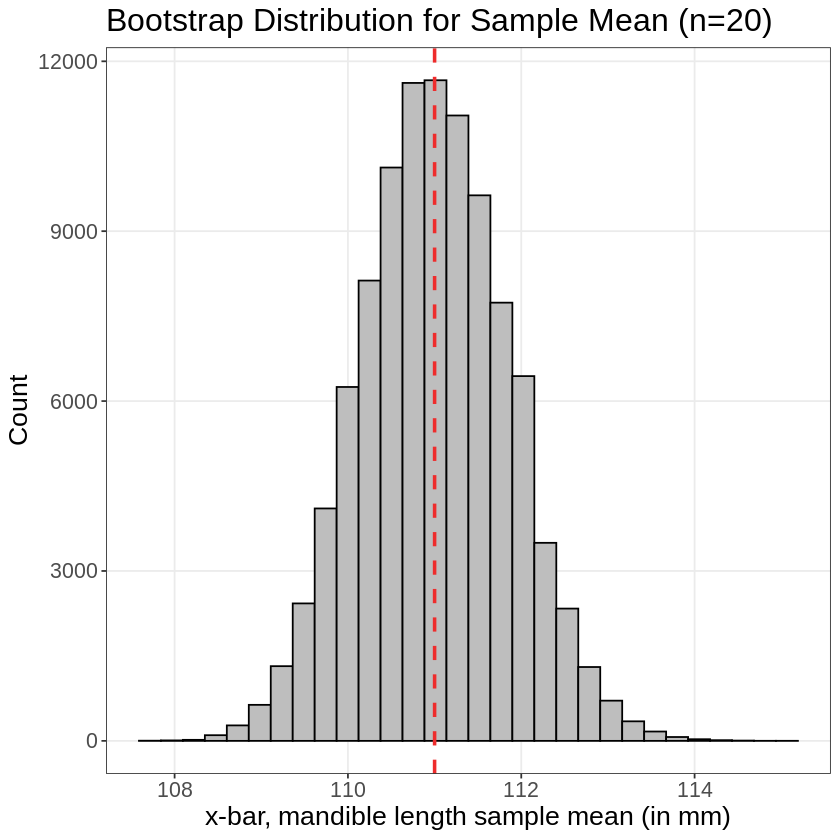

In [ ]:
# histogram representing bootstrap distribution
ggplot(df, aes(x = samp_mean)) +
  # create histogram to display bootstrap dist
  geom_histogram(
    fill = "gray",
    color = "black",
    bins = 30
  ) +
  # add vertical reference lines
  geom_vline(
    xintercept = mean(jaw_sample),
    linetype = "dashed",
    col = "firebrick2",
    linewidth = 1
  ) +
  # customize labels
  labs(
    title = "Bootstrap Distribution for Sample Mean (n=20)",
    x = "x-bar, mandible length sample mean (in mm)",
    y = "Count",
  ) +
  # customize layout
  theme_bw() +
  theme(
    panel.grid.minor = element_blank(),  # remove minor gridlines
    text = element_text(size=16)  # increase font size
  )

### <a name="quest4">Question 4</a>

---

What are the mean and standard error of the bootstrap distribution? Use the code below to compute each value.

In [ ]:
# calculate mean of bootstrap dist


# calculate bootstrap standard error


#### <a name="sol4">Solution to Question 4</a>

---

<br>  


<br>



### <a name="17ci-95">A 95% Bootstrap Percentile Confidence Interval</a>

---

The interval between the $2.5$ and $97.5$ percentiles (or $0.025$ and $0.975$ quantiles) of the bootstrap distribution of a statistic is a <font color="dodgerblue">**95% bootstrap percentile confidence interval**</font> for the corresponding parameter.


<center>
<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/e/e9/17fig-boot-ci.png"
alt="A 95% Bootstrap Percentile Confidence Interval" width = "50%"/>
<figcaption aria-hidden="true">
Credit: Adam Spiegler, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>
</figcaption>
</figure>
</center>

-   If most of the sample statistics are located in a certain interval of the bootstrap distribution, it seems plausible the true value of the parameter is in this interval!
-   We are 95% confident that the interval contains the actual value of the population parameter since 95% of the bootstrap resamples are inside this interval.
-   <font color="dodgerblue">**Confidence interval estimates give a range of plausible values for an unknown parameter.**</font>

When we interpret the practical meaning of a confidence interval, we attach the uncertainty of the estimate to the interval (which is uncertain) and not the parameter we are estimating (which is unknown but fixed).

> There is a 95% chance the interval estimate contains the population parameter.



### <a name="quest5">Question 5</a>

---

In the first code cell below, use bootstrap sample means stored in `boot_dist` to find a 95% bootstrap confidence interval for the mean mandible length of all golden jackals.

In the second code cell, add dashed, blue vertical lines to indicate the cutoffs in a histogram representing the bootstrap distribution for the mean.

Finally, give a practical interpretation of the 95% bootstrap confidence interval in the text cell below the code cells.

<br>  

<font color="mediumseagreen">*Hint*: Recall the `quantile()` function in R. Run the command `?quantile` for a refresher!</a>


In [ ]:
# compute cutoffs for a 95% bootstrap confidence interval


In [ ]:
# add two verticals lines to original plot
ggplot(df, aes(x = samp_mean)) +
  # create histogram to display bootstrap dist
  geom_histogram(
    fill = "gray",
    color = "black",
    bins = 30
  ) +
  # add vertical reference line
  geom_vline(
    xintercept = mean(jaw_sample),
    linetype = "dashed",
    col = "firebrick2",
    linewidth = 1
  ) +
  # customize labels
  labs(
    title = "Bootstrap Distribution for Sample Mean (n=20)",
    x = "x-bar, mandible length sample mean (in mm)",
    y = "Count",
  ) +
  # customize layout
  theme_bw() +
  theme(
    panel.grid.minor = element_blank(),  # remove minor gridlines
    text = element_text(size=16)  # increase font size
  )

#### <a name="sol5">Solution to Question 5</a>

---

Informal: The interval from 109.4 mm to 112.7 mm gives the plausible range of values for the mean mandible length of all golden jackals.

<br>

More formal: There is a 95% chance the interval from 109.4 mm to 112.7 mm contains the mean mandible length of all golden jackals.

## <a name="quest6">Question 6</a>

---

Construct a 90% bootstrap confidence for the standard deviation of the mandible the length of all golden jackals. Include a plot of the bootstrap distribution for the standard deviation marking the endpoints of the bootstrap confidence interval.

In [ ]:
# compute cutoffs for 90% confidence interval for sd


In [ ]:
# create plot



## <a name="quest7">Question 7</a>

---

Create function named `boot_ci()` that takes four arguments as inputs:

- `samp`, a vector of values from a sample.
- `stat`, a statistical function (i.e. `mean`, `sd`, `median`, etc.)
- `level`, a confidence level (as a decimal).
- `N`, the number of bootstrap resamples to include.
  - This is an optional argument with default set to `N = 10^5`.

and generates a bootstrap confidence interval. Then use `boot_ci` to check your answer from [Question 6](#quest6).


In [ ]:
# create boot_ci function


In [ ]:
# check previous result
set.seed(012)  # fix the randomization for reproducible code


## <a name="kkn">Example: K Nearest Neighbors</font>

---



<figure>
<img
src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flores_de_%C3%8Dris.png/512px-Flores_de_%C3%8Dris.png?20230708171909"
alt="Species of Iris Flower" width = "60%"/>
<figcaption aria-hidden="true">
Credit:  Diego Mariano, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons</figcaption>
</figure>

We now use a `for` loop to determine the <font color="dodgerblue">**K nearest neighbors**</font> (or <font color="dodgerblue">**KNN**</font>)of a set of locations. For each location, we determine the K locations that are nearest to the current location. These K locations are the nearest neighbors of the current location.

We will use the `iris` data frame which we can access in `base` R without loading any special package. The documentation states:

> This famous (Fisher's or Anderson's) iris data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris.  The species are *Iris setosa*, *versicolor*, and *virginica*.

- In the first two code cells below we load the `iris` data frame and view the first 5 rows.

In [ ]:
data("iris")
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### <a name="viz-iris">Visualizing Clusters in the `iris` Data</a>

---

In the code cell below, we create a scatter plot to compare the `Petal.Length` and `Petal.Width` variables, distinguishing each point based on the species of the iris.


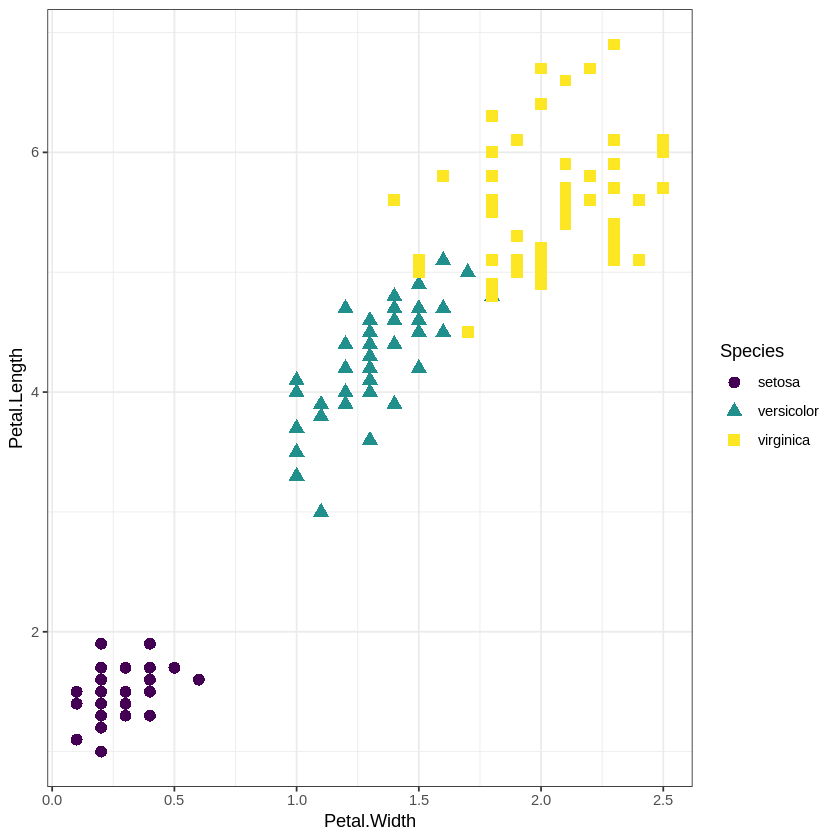

In [ ]:
ggplot(iris, aes(x = Petal.Width, y = Petal.Length, col = Species, shape = Species)) +
  geom_point(size = 3) +
  scale_colour_viridis_d() +
  theme_bw()

### <a name="wrangle-iris">Wrangling the `iris` Data</a>

---

We will restrict our analysis to `Petal.Length` (column 3) and `Petal.Width` (column 4) measurements of the petals of each observation in the `iris` data set. In the code cell below, we:

-  Create a subset `iris_petal` that includes only these two columns for all 150 observations, and
- Scale values so we weigh both features equally in our analysis.




In [2]:
iris_petal <- scale(iris[, 3:4])
head(iris_petal)

Petal.Length,Petal.Width
-1.335752,-1.311052
-1.335752,-1.311052
-1.392399,-1.311052
-1.279104,-1.311052
-1.335752,-1.311052
-1.165809,-1.048667


### <a name="nn3">Finding the 3 Nearest Neighbors</a>

---

We will determine the 3 nearest neighbors of each of the $n=150$ observations in `iris_petal` using a `for` loop. We will store our results in a `list` with $n=150$ elements.

- Each element of the `list` will be a `numeric` `vector` of length 3 indicating the 3 nearest neighbors of the current location.
- We could store this in a `matrix` for efficiency, but we use a `list` to get broader exposure to the R programming language.

We start by creating `nnlist`, which is the `list` that will store the nearest neighbors for each location. We can create an empty vector using the `vector` function, specifying `mode = "list"`, then indicating the length of the `list`.

In [3]:
nnlist <- vector(mode = "list", length = nrow(iris_petal))

Why did we specify `length = nrow(iris_petal)` instead of `length = 150`? This allows us to adapt our code to a new set of locations that may not be the same size.

- *It is wise not to “hard code” values (like the size of a `matrix` or `list` or even the values for a loop) into our code to make it easier to use the code for a new setting.*

To find the nearest neighbors of each location, we need to find the distances between locations.

The `dist` function can be used to determine the distances between the coordinates contained in a `matrix` object. The function can compute many kinds of distance, but the default is `"euclidean"`, which is what we need. By default, the `dist` function doesn't return the diagonal elements of the distance matrix nor the upper diagonal elements. A trick to get the complete distance matrix is to use the `as.matrix` function on the object returned by the `dist` function. The value contained in row `i` and column `j` of the distance matrix is the distance between the $i$th location and the $j$th location.

With all that being said, we compute the distance matrix for the locations in `coords`.

In [4]:
d <- as.matrix(dist(iris_petal))

This matrix is too big to look at easily. However, from the code below, we can see that the distance between the 3rd and 17th observations is $0.262385$.

In [5]:
d[3, 17]

[1] 0.2623854

How do we find the locations nearest the current location? We need to find the locations that have the smallest distance from the current location. The easiest way to do this in R is using the `order` function.

The `order` function takes a vector of values and indicates which positions of the vector contain the smallest values, in ascending order. The `decreasing` argument of `order` can be changed to `TRUE` to order the values in descending order.

Here's a quick example that uses the `order` functions to order the values of a `numeric` `vector` from smallest to largest.

In [6]:
order(c(5, 1, 2, 4))

[1] 2 3 4 1

The second element of the vector we gave to `order` has the smallest value. The third element has the second smallest value. The fourth element has the next smallest value. The first element has the largest value.

We can use the `order` function to order the distances associated with each location. Let's do this for the first flower in `iris_petal`. We pass the vector of distances between the first location and all other locations (including itself) to the `order` function. This vector of distances is simply the first row of `d`.

In [7]:
order(d[1,])

[1]   1   2   5   9  29  34  48  50   4   8  11  28  35  40  49   3  37  39
 [19]  43  15  36  12  26  30  31  47  13  38   7  18  46  10  33  20  41  42
 [37]  21  14  19  23  16  22  32  17  25  27   6  45  24  44  99  58  94  61
 [55]  80  82  81  63  70  68  65  83  93  96  54  72  90  89 100  60  95  97
 [73]  91  75  98  88  56  74  66  76  59  62  92  51  64  52  67  69  79  85
 [91]  77  55  87  86  53  73  57 107 120 134  84  78  71 127 139 135 124 128
[109] 150 147 102 143 122 130 114 117 138 112 111 104 148 109 126 140 113 129
[127] 142 131 108 125 146 116 133 103 115 149 105 121 132 137 141 144 123 136
[145] 106 145 101 118 110 119

In [ ]:
order(d[2,])

In [ ]:
order(d[3,])

Unsurprisingly, the first location is “closest” to itself. The next closest location is location 2. The next location after that is location 5, then 9, then 29, and so on. A K nearest neighbors algorithm doesn't usually allow a location to be its own neighbor. So, in our case, **we want to select the second through fourth elements of the ordered distances**. We can do that using the code below.

In [8]:
od1 <- order(d[1,])
od1[2:4]

[1] 2 5 9

Now, we will use a loop to repeat this process for all locations in `coords`. For each location we will order the distances, determine the indices of the 3 nearest neighbors, and then place the nearest neighbor indices in the appropriate elements of `nnlist`.

In [9]:
for (i in 1:length(nnlist)) {
  # order the distances associated with the ith location
  odi <- order(d[i, ])
  # extract the 3 nearest neighbors for observation i
  # (not including the location itself)
  nni <- odi[2:4]
  # put the nn of observation i in the ith position of nnlist
  nnlist[[i]] <- nni
}

We look at the first 3 elements of `nnlist`.

In [10]:
nnlist[1:3]

[[1]]
[1] 2 5 9

[[2]]
[1] 2 5 9

[[3]]
[1] 37 39 43

Observations 1 and 2 have the same standardized values for `Petal.Length` and `Petal.Wdith`, thus the nearest neighbors of the second flower includes the second flower itself. We should find:

- The nearest neighbors of the first location are locations 2, 5, and 9.
- The nearest neighbors of the second location are locations <font color="red">1</font>, 5, and 9.
- The nearest neighbors of the third location are locations 37, 39, and 43.

We modify the code below to include an `if-else` statement to identify and correct these instances.

In [11]:
for (i in 1:length(nnlist)) {
  # order the distances associated with the ith location
  odi <- order(d[i, ])
  # extract the 3 nearest neighbors for observation i
  # (not including the location itself)
  if (odi[1] != i) {
      nni <- odi[c(1, 3:4)]
  } else {
  nni <- odi[2:4]
  }
  # put the nn of observation i in the ith position of nnlist
  nnlist[[i]] <- nni
}

In [12]:
nnlist[1:3]

[[1]]
[1] 2 5 9

[[2]]
[1] 1 5 9

[[3]]
[1] 37 39 43

## <a name="nested">Nested `for` Loops</a>

---

A <font color="dodgerblue">**nested**</font> `for` loop is one that uses one or more `for` loops inside of another `for` loop. Here is some pseudo code to illustrate a nested `for` loop.

```
for (i in i_vector) {
  # some code
  for (j in j_vector) {
    # some code
    for (k in k_vector) {
      # some code
    }
    # some code
  }
  # some code
}
```

The pseudo code above has 3 loops. The outermost loop is iterating over `i`, the second loop is iterating over `j`, and the innermost loop is iterating over `k`, while .

The innermost loop iterates the fastest. This is because for each value if `i` and `j`, we iterate `k` through all the values in `k_vector`. The second loop iterates the second fastest because it iterates through all the values in the `j_vector` for a single value of `i`, but not as fast as innermost loop, which will have iterated `k` through the all the values in `k_vector` `length(j_vector)` times!

<font color="dodgerblue">It is helpful to use proper formatting to make the code easier to process. Make sure to indent the code inside a `for` loop to indicate that it is run inside a certain `for` loop.</font>

We will use a double loop to compute the distance matrix of a set of coordinates.

Recall that if $(x_i, y_i)$ and $(x_j, y_j)$ are two points, then the Euclidean distance between them is computed as

<a name="eq-dij"></a>
$$
d_{i,j} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}.
 \qquad(1)$$

Let's create a small set of 5 coordinates.

In [ ]:
coords <- cbind(c(1, 4, 2, 5, 3), c(9, 4, 3, 2, 1))
coords

1,9
4,4
2,3
5,2
3,1


Each row of `coords` represents a location. For each row of `coords`, we need to iterate over all the locations of `coords`. For each combination of locations, we need to use the distance equation [(1)](#eq-dij) to compute the distance between the locations.

- We first create a matrix, `d`, to store the distances we compute in our loop.
- Then we create a nested `for` loop to compute and store each distance.

In [ ]:
# create matrix container to store distances
d <- matrix(nrow = nrow(coords), ncol = nrow(coords))

We now compute the distances for all pairs of locations.

In [ ]:
# compute distances
n <- nrow(coords)

for (i in 1:n) {
  for (j in 1:n) {
    d[i, j] <- sqrt((coords[i, 1] - coords[j, 1])^2 + (coords[i, 2] - coords[j, 2])^2)
  }
}
d # print d

0.000000,5.830952,6.082763,8.062258,8.246211
5.830952,0.000000,2.236068,2.236068,3.162278
6.082763,2.236068,0.000000,3.162278,2.236068
8.062258,2.236068,3.162278,0.000000,2.236068
8.246211,3.162278,2.236068,2.236068,0.000000


We can compare this to the output of the `dist` function to confirm that we have computed the distances correctly.

In [ ]:
as.matrix(dist(coords))

,1,2,3,4,5
1,0.000000,5.830952,6.082763,8.062258,8.246211
2,5.830952,0.000000,2.236068,2.236068,3.162278
3,6.082763,2.236068,0.000000,3.162278,2.236068
4,8.062258,2.236068,3.162278,0.000000,2.236068
5,8.246211,3.162278,2.236068,2.236068,0.000000


# <a name="while">`while` Loops</a>

---

A <font color="dodgerblue">**`while`**</font> loop is a loop that repeats a set of actions while a condition is `TRUE`. The loop stops running when the provided condition is `FALSE`.

A `while` loop can be used to do the same thing as a `for` loop but is better suited for situations for which we do not know how many times we need to iterate.

A common use of a `while` loop is to iteratively improve an approximation one iteration at a time until the change in the approximation is smaller than some standard of precision.

The basic syntax of a `while` loop is shown in the pseudo code below.

```
while (condition) {
  # some code to run
}
```

> We can read a `while` loop in the following way: While our condition is `TRUE`, run the following code.


We have the following components of the `while` loop:

-   The loop starts with `while`, which indicates that we want to implement a `while` loop.
-   Inside the parentheses after `while`, we have a `condition`.
-   If `condition` is `TRUE`, we run the code in between the curly braces.
-   We then return to the `condition`. If `condition` is still `TRUE`, then we run the code in between the curly braces again.
-   We keep repeating the previous step until `condition` is `FALSE`.


Here's what happens in a `while` loop:

1.  We check whether our condition is `TRUE`.
2.  If the condition is `TRUE`, then we run the code in the curly braces. This code will perform some actions that should potentially have an impact on the condition.
3.  We repeat steps 1 and 2 until our condition is `FALSE`.
4.  We exit the loop.

We provide a trivial example of a `while` loop that prints the current value of an iterator, `i`.

-   We initially set `i` to `1`.
-   The `while` loop runs as long as `i` is less than 4.
-   We print the current value of `i` and then increment `i` (meaning we increase it by 1). - We repeat printing the current value of `i` until `i` is 4.

In [ ]:
# set iterator
i <- 1
while (i < 4) {
  message("The current iterator value is ", i)
  i <- i + 1
}

The current iterator value is 1

The current iterator value is 2

The current iterator value is 3



## <a name="inf-loop">Caution: Infinite Loops</a>

---

`while` loops tend to be more dangerous than `for` loops because it is easy create an <font color="dodgerblue">**infinite loop**</font> that never stops running.

An infinite loop occurs when our `while` condition is always satisfied, so the loop keeps running indefinitely or until an error occurs (like running out of memory).

If we want to crash our computer, we can run the following code:

```
i <- 2
while (i > 0) {
  i = i^2
}
```

In the code above, we start by setting `i` equal to `2`. We then check whether `i` is more than 0. If it is more than 0 then we update `i` to be the current value of `i` squared. Our condition will always be `TRUE`, so we keep squaring the current value of `i` indefinitely.

If we are stuck in an infinite loop, then:

- In Colab we can click the STOP button, go to `Runtime -> Interrupt Execution`, or a use keyboard shortcut.

- In RStudio or Posit Cloud:
  - Sometimes, a STOP button is available in the Console.
  -   Pressing `Ctrl + c` (PC) or `Cmd + c` (Mac) may stop a loop.
  -   We can click “Session” in the Menu and then click “Interrupt R” to stop the code being executed.



In [ ]:
# copy code from above and
# practice stopping execution of an infinite loop


## <a name="bisec">Example: Bisection</a>

---

The [**bisection method**](https://en.wikipedia.org/wiki/Bisection_method) is a method for finding the “zeros” or “roots” of a continuous function, i.e., where the function equals 0. The bisection method requires that we start the algorithm at two values such that the function has opposite signs for those values.

Suppose we have a continuous function, $f(x)$. The bisection method is implemented in the following way:

1.  Find two points, $a$ and $b$, such that $a < b$ and $f(a)f(b) < 0$.
2.  Compute the average of $a$ and $b$, $m = (a + b)/2$
3.  Determine whether $| f(m) | > \epsilon$, where $\epsilon$ is some very small positive number like 0.0001. If our condition is satisfied, perform the following steps:
    -  If $f(m)f(a) < 0$, then a root exists between $a$ and $m$. Set $b = m$ and return to step 2.
    -  Otherwise, a root exists between $m$ and $b$. Set $a = m$ and return to step 2.

<font color="dodgerblue">**When our condition is NOT satisfied, we exit the `while` loop, and we have found an (approximate) root of our function.**</font>



### <a name="bisect-alg">Defining an Bisection Function</a>

---

We now create a function, `bisect()`, that implements the bisection method. The function will take arguments:

-   `lower`: The smaller starting value, $a$.
-   `upper`: The upper starting value, $b$.
-   `fun`: A continuous function $f(x)$ that (presumably) has zeros.
-   `eps`: A tolerance value, $\epsilon$. The value we choose for $\epsilon$ indicates how close we must be to a true “zero”.
  - The `eps` argument is optional.
  - If no value for `eps` is specified, the default `eps = 0.0001` is used.

We implement the bisection method below:

1.  Start by checking whether `fun(lower) * fun(upper) > 0`. If this is `TRUE`, then then the bisection algorithm may fail and we might end up in an infinite loop! We use the `stop` function to exit the function with an error if we have bad starting values.
2.  Compute `m` using the `lower` and `upper` values.
3.  Check if `m` is a root. If it's not a root:<br>
    a. Use a control statement to decide whether to update the `lower` or `upper` value to `m`. <br>
    b.  Compute `m` using the `lower` and `upper` values. <br>
    c.  Return so step 3. <br>
4.  Return the final value of `m`, which is an (approximate) root of `fun`.

In [ ]:
bisect <- function(lower, upper, fun, eps = 0.0001) {
  # step 1: check if product of values is negative
  if (fun(lower) * fun(upper) > 0) {
    stop("\nBig yikes!",
         "\nThose starting values are sus.",
         "\nYou need to update those values so that fun(lower) * fun(upper) < 0.")
  }
  m <- (lower + upper)/2   # step 2: compute m
  # step 3: determine if we're at (or really close to a root)
  while (abs(fun(m)) > eps) { # step 3a
    # step 3b: update value of m
    if (fun(m) * fun(lower) < 0) {
      upper <- m  # if the root is below m
    } else {
      lower <- m  # if the root is above m
    }
    # determine a new candidate for m
    m <- (lower + upper)/2
  }
  # repeat step 3
  return(m)
}

Consider the continuous polynomial function $$
f(x) = (x - 3)(x + 1).
$$

From looking at this equation, we can easily verify that $f(x) = 0$ when $x = 3$ or $x = -1$.

We create a function for $f(x)$ below.

In [ ]:
f <- function(x) {
  (x - 3) * (x + 1)
}

We now plot $f(x)$ for for a sequence of $x$ values between -2 and 4.

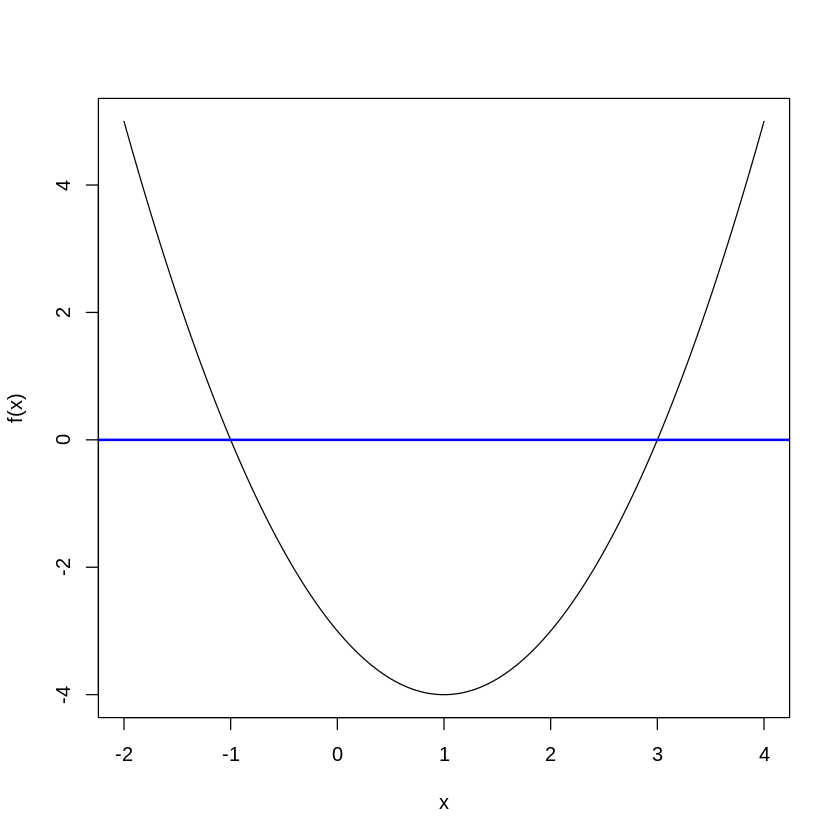

In [ ]:
x_vals <- seq(-2, 4, len = 1000)
plot(x_vals, f(x_vals), type = "l", xlab = "x", ylab = "f(x)")
# blue line at the center of bootstrap dist
abline(h=0, col = "blue", lwd = 2)

We will try to find a root of `f` using `bisect` using starting values of `2` and `5`.

In [ ]:
bisect(lower = 2, upper = 5, fun = f)

[1] 2.999985

If we choose different starting values then we can find the other root of $f$.

In [ ]:
bisect(lower = -2, upper = 1, fun = f)

[1] -1.000015

What happens if we choose bad starting values?

In [ ]:
bisect(lower = -4, upper = 5, fun = f)

ERROR: Error in bisect(lower = -4, upper = 5, fun = f): 
Big yikes!
Those starting values are sus.
You need to update those values so that fun(lower) * fun(upper) < 0.


## <a name="quest8">Question 8</a>


---

$\pi$ is the ratio of a circle's circumference to its diameter. $\pi$ is an irrational approximately equal to $\color{dodgerblue}{3.1415926535}8979323846\ldots$
<br>

Use the `bisect` function to approximate the value of $\pi$ to 10 decimal places.

<font color="mediumseagreen">Hint: Can you think of a basic function that has $\pi$ is a zero? The constant $\pi$ is entered as `pi`.</font>

In [ ]:
# create function


In [ ]:
# use bisect to approximate pi


# <a name="loop-vec">Loops Compared to Vectorization</a>

---

Loops in R are notoriously slow. When possible, we should prefer <font color="dodgerblue">**vectorized**</font> operations over loops. A vectorized operation uses a fast, pre-compiled function to apply an operation to all elements of a vector, matrix, list, etc., without using a loop.



## <a name="loop-mean">A Loop to Compute the Mean of a Numeric Vector</a>

---

Let's say we want to compute the mean of a sample of numeric values:

$$\bar{x} = \frac{x_1 + x_2 + \ldots + x_n}{n} = \frac{\sum_{i=1}^n x_i}{n}.$$


We create a function, `mean_loop`, to compute the mean of a numeric vector. We describe our approach:

-   The function takes, `x`, which we assume is a numeric vector.
-   We calculate and store the size of vector `x` to `n`.
-   We create a an object `my_sum` whose initial value is equal to 0.
-   We create a `for` loop to iterate `i` over every element of `x`.
  - For each value of `i`, we add `x[i]` to the previous value of `my_sum`.
- After the loop is complete, we divide `my_sum` by `n` and assign the result to `my_mean` which is displayed on screen.


In [ ]:
mean_loop <- function(x) {
  n <- length(x)  # number of elements in sample
  my_sum <- 0  # initialize the value of my_sum
  for (i in 1:n) {
    my_sum <- my_sum + x[i]  # add x_i to previous sum
  }
  my_mean <- my_sum / n  # divide sum by n
  return(my_mean)
}

In [ ]:
# apply mean_loop to compute mean petal length
mean_loop(iris$Petal.Length)

[1] 3.758

## <a name="vector-mean">A Vectorized Approach for the Mean</a>

---

What is wrong with this function? Nothing, really. Except that it's slow compared to the equivalent vectorized version of this calculation.

We can perform the same calculation as follows:
- Apply the built-in function `sum()` to add all the values in a numeric vector.
- Apply the built-in function `length()` that gives the number of elements stored in a vector.
- The mean of a numeric vector `x` can therefore be computed with `sum(x) / length(x)`.


In [ ]:
mean_vec <- function(x) {
  return(sum(x) / length(x))
}

In [ ]:
mean_vec(iris$Petal.Length)

[1] 3.758

## <a name="comp-speed">Comparing Computational Speeds</a>

---

The `mean()` function is a vectorized version of a cumulative sum that relies on fast, pre-compiled code. We can see in the code cell below that it gives the same results as the previous functions `mean_loop()` and `mean_vec()`.

In [ ]:
# use mean function to check result
mean(iris$Petal.Length)

[1] 3.758

We use the `microbenchmark` function in the **microbenchmark** package (Mersmann 2023) to compare the timings of `mean_loop()` and `mean_vec()`. The `microbenchmark` function will run the provided functions 100 times, by default.

-   We sample 1000 values from a standard normal distribution.,
-   We use `microbenchmark` to time how long it takes to compute the cumulative sum of the sampled values using both cumulative sum functions. We repeat this timing 100 times for each function.
-   We plot the results for comparison.

In [ ]:
# run only if you need to install and load microbenchmark
#install.packages("microbenchmark")
#library(microbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



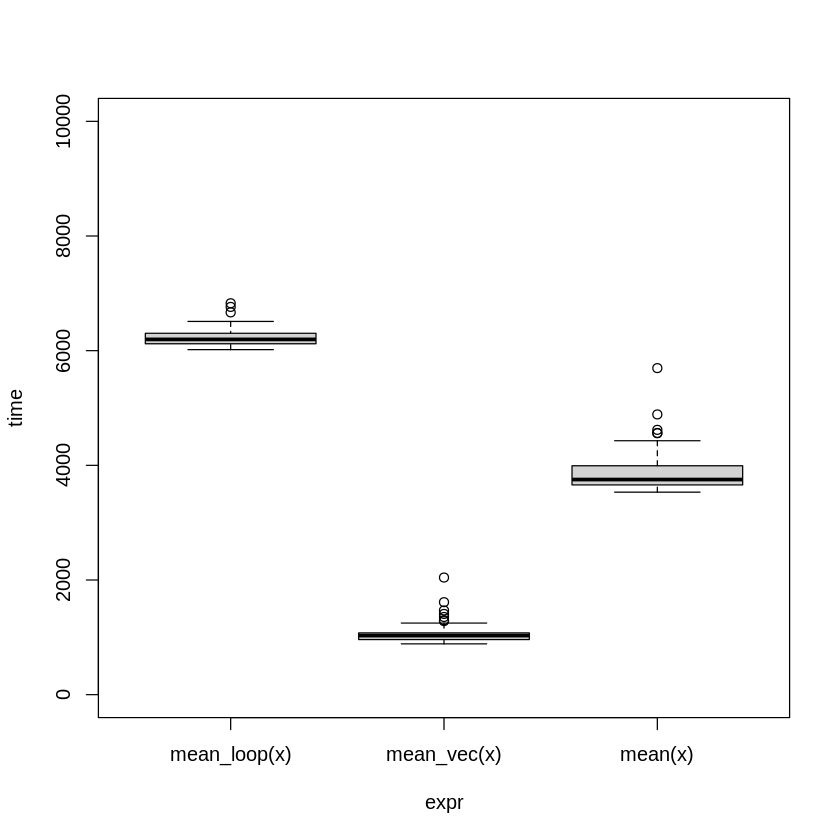

In [ ]:
x <- iris$Petal.Length
# compute the mean 100 times using each approach
mean_timings <- microbenchmark(mean_loop(x), mean_vec(x), mean(x))
plot(mean_timings, ylim=c(0,10000))

While the exact timing results will depend on the computer the timings are performed on, the plot above shows that the vectorized `mean_vec()` function is substantially faster than the the other two methods. The `mean()` function is slower than `mean_vec()` but faster than the `for` loop method used in `mean_loop()`.

These results may seem trivial, but for large data sets where these operations are performed thousands or millions of times, vectorized operations can be many orders of magnitude faster than loops. The `iris` data frame has $n=150$ observations. Let's compare the results for a random vector we create that has $10,\!000$ observations!



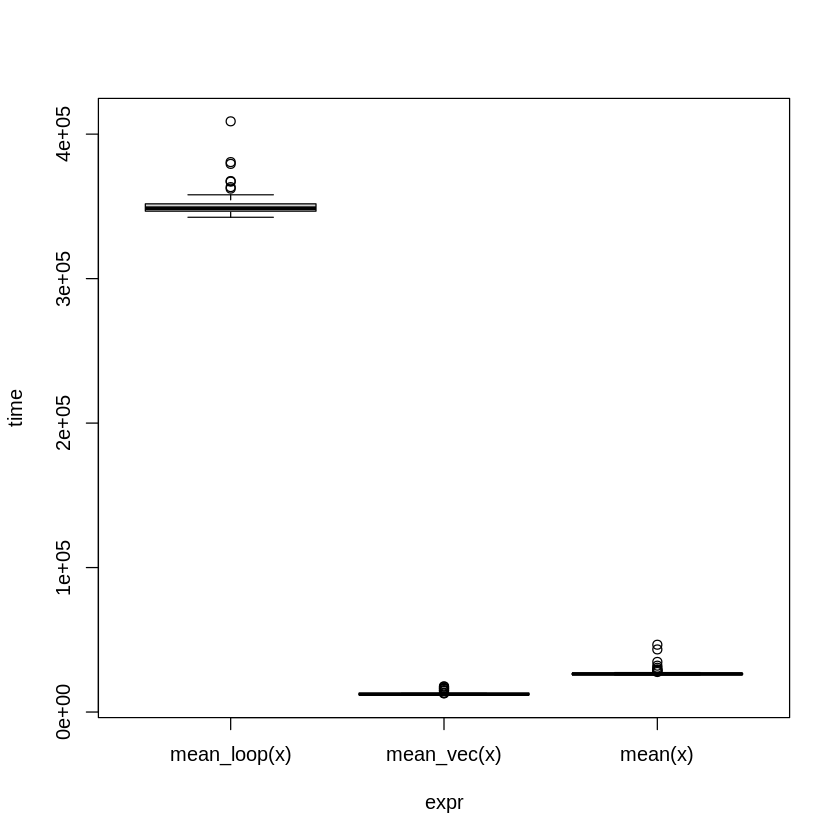

In [ ]:
x <- rnorm(10000)
# compute the mean 100 times using each approach
mean_timings <- microbenchmark(mean_loop(x), mean_vec(x), mean(x))
plot(mean_timings)

## <a name="CC License">Creative Commons License Information</a>
---

![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

Materials created by the [Department of Mathematical and Statistical Sciences at the University of Colorado Denver](https://github.com/CU-Denver-MathStats-OER/)
and is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/).